In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_transunion = pd.read_csv("data/transunion_processed.csv")
df_demographics = pd.read_csv("data/demographics_agg.csv")

In [5]:
df_transunion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450091 entries, 0 to 450090
Data columns (total 8 columns):
Unnamed: 0    450091 non-null int64
PostalCd      450091 non-null object
Count         450091 non-null float64
Sum           450091 non-null float64
Min           450091 non-null float64
Max           450091 non-null float64
Mean          450090 non-null float64
Std           450090 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 27.5+ MB


In [6]:
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793779 entries, 0 to 793778
Data columns (total 58 columns):
PostCode                                                     793779 non-null object
Age                                                          793779 non-null float64
Income                                                       793779 non-null float64
Family Income                                                793779 non-null float64
Family Size                                                  793779 non-null float64
Population Count                                             793779 non-null int64
Immigration_Immigrants                                       793779 non-null float64
Immigration_Native                                           793779 non-null float64
Gender_Female                                                793779 non-null float64
Gender_Male                                                  793779 non-null float64
Ownership_Owned                           

## Transunion have less rows than aggregated individual data. Join  both together

In [7]:
df_merged = pd.merge(
    df_demographics, df_transunion,
    how='inner', left_on="PostCode", right_on="PostalCd"
)

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444584 entries, 0 to 444583
Data columns (total 66 columns):
PostCode                                                     444584 non-null object
Age                                                          444584 non-null float64
Income                                                       444584 non-null float64
Family Income                                                444584 non-null float64
Family Size                                                  444584 non-null float64
Population Count                                             444584 non-null int64
Immigration_Immigrants                                       444584 non-null float64
Immigration_Native                                           444584 non-null float64
Gender_Female                                                444584 non-null float64
Gender_Male                                                  444584 non-null float64
Ownership_Owned                           

In [9]:
df_merged.drop("PostalCd", inplace=True, axis=1)

In [10]:
correlation = df_merged.corr()

In [11]:
correlation[(correlation["Mean"] > 0.2) | (correlation["Mean"] < -0.2)]["Mean"]

Income                                                       0.309214
Family Income                                                0.308743
Immigration_Immigrants                                      -0.216820
Immigration_Native                                           0.216820
Ownership_Owned                                              0.422081
Ownership_Rented                                            -0.422081
Dwelling_Other                                              -0.288814
Dwelling_Single-detached house                               0.334256
Education_Apprenticeship or trades certificate or diploma    0.213893
Education_No certificate, diploma or degree                 -0.203573
Ethnicity_North American                                     0.235369
Commute_Bicycle                                             -0.203338
Commute_Car (driver)                                         0.425502
Commute_Public transit                                      -0.302860
Commute_Walked      

In [12]:
correlated_cols = correlation[(correlation["Mean"] > 0.2) | (correlation["Mean"] < -0.2)].index

In [13]:
len(correlated_cols)

21

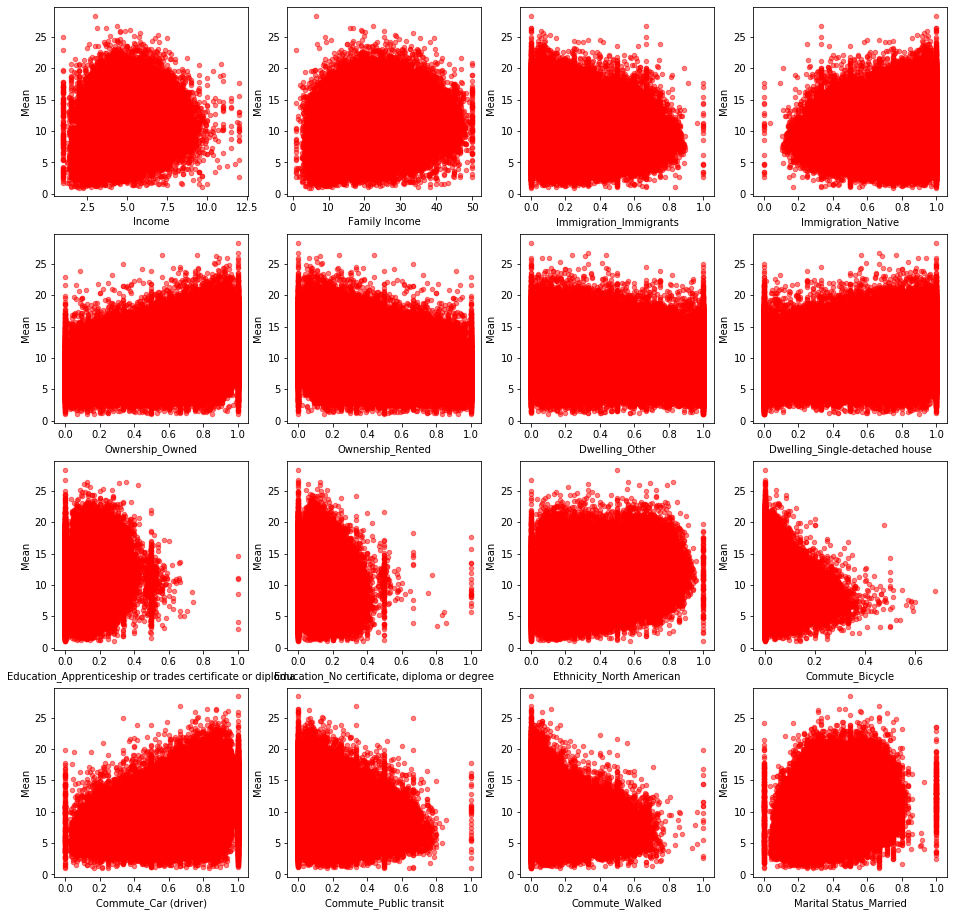

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
for xcol, ax in zip(correlated_cols, axes.reshape(-1)):
    df_merged.plot(kind='scatter', x=xcol, y='Mean', ax=ax, alpha=0.5, color='r')